In [1]:
#TODO: update code for Lightning

# from google.colab import drive
# drive.mount('/content/drive')

# update folder name according to data 
# folder_training_data = "#14 Hi_ILY_nothnig wo facemesh"
# folder_training_data = DATA_PATH

# import sys
# sys.path.append('/content/drive/My Drive/Bootcamp/Final Project/exploring action recognition/models/'+folder_training_data)

# Sign Language Detection Project



In [2]:
# %pip install tensorflow==2.10.0

In [3]:
# WARNING: updates of config may require restart of kernel if reload is unsuccessful
import config
# reload config without restarting the kernel
import importlib
importlib.reload(config)
from config import facemesh_included, actions, no_sequences, sequence_length, DATA_PATH, WEIGHTS_PATH, is_martin
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from model import create_model, create_improved_model, model_19

import numpy as np
import os

2024-05-15 03:52:12.497097: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 03:52:12.843193: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 03:52:12.891438: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib:/opt/aws-ofi-nccl/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-

In [4]:
KEYPOINT_PATH = "combined_keypoints"

# paths for keypoint files; update if needed
# X = np.load('/content/drive/MyDrive/Bootcamp/Final Project/exploring action recognition/models/#13 Hi_ILY_nothing/X.npy')
# y = np.load('/content/drive/MyDrive/Bootcamp/Final Project/exploring action recognition/models/#13 Hi_ILY_nothing/y.npy')
X = np.load(os.path.join(KEYPOINT_PATH,'X_combined.npy'))
y = np.load(os.path.join(KEYPOINT_PATH,'y_combined.npy'))

In [5]:
# training set size
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
# TODO: replace with train, validate and test split

# # Assuming 'data' is your dataset loaded as an array of shape [num_samples, num_features]
# np.random.shuffle(data)  # Shuffling the data to randomize input

# num_samples = data.shape[0]
# train_end = int(num_samples * 0.7)
# val_end = int(num_samples * 0.9)

# train_data = data[:train_end]
# val_data = data[train_end:val_end]
# test_data = data[val_end:]

# 7. Build and Train LSTM Neural Network

In [6]:
log_dir = os.path.join('Logs')

In [7]:
# OPTIONAL model() arguments
# available model_types: "LSTM", "Conv2D"
# tested activation functions: "tanh", "relu"; OTHERS: see below 
# tested activations for last neural layer: "softmax", "sigmoid"; OTHERS: "linear", "tanh", "relu", "softplus", "softsign", "selu", "elu", "exponential"
# neural multiplicator: multiply neurons per layer by this amount (default = 1); the higher NM, the longer the computation
# output will change according if facemesh_included = True or False

neural_factor = 10 # used for naming of weights file, so only update number 
model_type = "LSTM"
activation_function = "tanh"
activation = "softmax"
neural_factor = neural_factor
metrics = ['accuracy', 'categorical_accuracy', 'Precision', 'Recall']

# model = create_model(
#     model_type = model_type, 
#     activation_function = activation_function, 
#     activation = activation, 
#     neural_factor = neural_factor, 
#     metrics = metrics
#     )

# model = create_improved_model(
#     model_type = model_type, 
#     activation_function = activation_function, 
#     activation = activation, 
#     neural_factor = neural_factor, 
#     metrics = metrics
#     )




#Ensure data loading and preprocessing works as expected
# try:
#     # Example code to load combined data
#     combined_data_path = os.path.join(KEYPOINT_PATH, 'combined')
#     X = np.load(os.path.join(combined_data_path, 'X.npy'))
#     y = np.load(os.path.join(combined_data_path, 'y.npy'))
    
#     print("X shape:", X.shape)
#     print("y shape:", y.shape)
    
#     assert X.shape[1] == sequence_length
#     assert X.shape[2] == 258 if not facemesh_included else 1662
#     assert y.shape[1] == number_of_classes
    
# except Exception as e:
#     print("Error loading or validating data:", e)

model = model_19()


# reLU = Rectified Linear Activation Function: returns 0 if it receives any negative input, but for any positive value x it returns that value back.  It helps the model to account for non-linearity.
# Sigmoid: Outputs a value between 0 and 1, making it suitable for binary classification or multilabel classification tasks where each label is predicted independently.

Class weights: {0: 2.0, 1: 2.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.5, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0}


2024-05-15 03:52:16.077937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-15 03:52:16.078255: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib:/opt/aws-ofi-nccl/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-15 03:52:16.078424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib:/opt/aws-ofi-nccl/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-15 03:52:16.078529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynam

# Creating model by name

In [8]:
if is_martin:
    from model import build_which_model
    # build_which_model: 
    model_name = "model_1"
    model = build_which_model(model_name)

In [9]:
# EARLYSTOPPING
# Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', 
# and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is 
# no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, 
# model.stop_training is marked True and the training terminates.
# The quantity to be monitored needs to be available in logs dict. To make it so, pass the loss or metrics at model.compile().

# ARGUMENTS
# monitor: The metric to monitor. Default is "val_loss".
# min_delta: Min change in the monitored metric to be considered an improvement.
#            Any change less than this is not considered. Default is 0.
# patience: Epochs to wait for improvement before stopping. Default is 0.
# verbose: Verbosity mode, 0 is silent, 1 displays messages. Default is 0.
# mode: Defines when to stop training. Options are "auto", "min", "max".
#       "min" stops when decrease in metric ceases.
#       "max" stops when increase in metric ceases.
#       "auto" infers direction from the monitored metric. Default is "auto".
# baseline: Baseline value for comparison. Stops if no improvement over this.
#           Default is None.
# restore_best_weights: Restores weights from the best epoch if True.
#                       Uses last training weights if False. Default is False.
# start_from_epoch: Waits this many epochs before monitoring. Allows for warm-up.
#                   Default is 0.

# needs split of data into train, validation, and test (70/20/10%) sets to be used
# tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=20,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=True,
#     start_from_epoch=0,
# )

tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq="epoch",
    profile_batch=0,
    embeddings_freq=0,
    embeddings_metadata=None,
)

### Extra cell for training 😇 

In [10]:
# val_data = 
# hist = model.fit(X_train, y_train, epochs=2000, validation_data=val_data, callbacks=[early_stopping])
# model.fit(X_train, y_train, epochs=2000, callbacks=[early_stopping])

epochs = 2000

hist = model.fit(X_train, y_train, epochs=epochs, callbacks=[tb_callback])

Epoch 1/2000


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            82688     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

## 7.5 Model performance visualizations

In [ ]:
import seaborn as sns  
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-7t2xpvkd because the default path (/teamspace/studios/this_studio/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


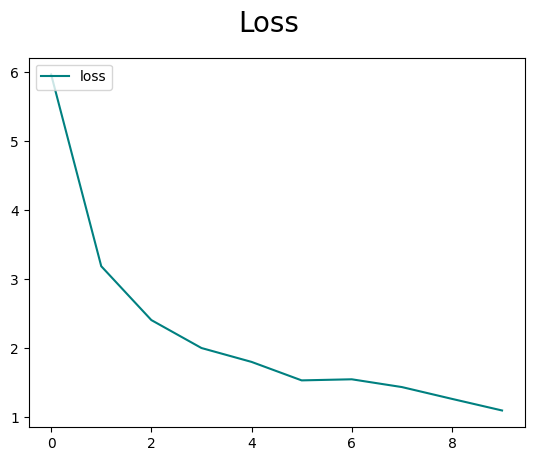

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

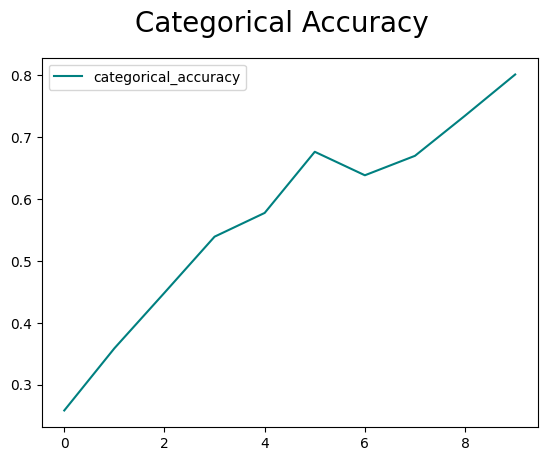

In [ ]:
fig = plt.figure()
plt.plot(hist.history['categorical_accuracy'], color='teal', label='categorical_accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Categorical Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 8. Make predictions

In [ ]:
res = model.predict(X_test)

20/20 [==============================] - 1s 18ms/step


In [ ]:
actions[np.argmax(res[4])]

'background'

In [ ]:
actions[np.argmax(y_test[4])]

'background'

In [ ]:
actions[np.argmax(res[3])]

'Happy'

In [ ]:
actions[np.argmax(y_test[3])]

'Happy'

In [ ]:
# weights_name = "weights_wo_facemesh_LSTM_tanh_softmax_NM20_testsize0.3"
# model.load_weights(os.path.join(WEIGHTS_PATH, weights_name + ".keras"))

In [ ]:
len(X_test)

612

In [ ]:
res = model.predict(X_test)
correct_count = 0
for i in range(len(res)):
  prediction = actions[np.argmax(res[i])]
  actual = actions[np.argmax(res[i])]
  if prediction == actual:
    correct_count += 1
  print("prediction: ", prediction)
  print("actual    : ", actual)
  print("~"*30)
print("~"*30)
print("accuracy on x_test: ", correct_count/len(res)*100, "%"
f"correct_count {correct_count}")

13/20 [==================>...........] - ETA: 0s

20/20 [==============================] - 0s 19ms/step
prediction:  ThankYou
actual    :  ThankYou
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  ThankYou
actual    :  ThankYou
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  background
actual    :  background
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  Happy
actual    :  Happy
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  background
actual    :  background
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  It
actual    :  It
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  Happy
actual    :  Happy
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  Eat
actual    :  Eat
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  Tired
actual    :  Tired
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  background
actual    :  background
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  NoHands
actual    :  NoHands
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  NoHands
actual    :  NoHands
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
prediction:  Bread
actual    :  Bread
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
predictio

## 9. Save weights

In [ ]:
# Original Code, needs if-handling when Martin's model is used
if facemesh_included == True:
    weights_name = f"weights_w_facemesh_{model_type}_{activation_function}_{activation}_NM{str(neural_factor)}_testsize{test_size}"
elif facemesh_included == False:
    weights_name = f"weights_wo_facemesh_{model_type}_{activation_function}_{activation}_NM{str(neural_factor)}_testsize{test_size}"

weights_name = f"Martins_model_19_wo_facemesh_{model_type}_{activation_function}_{activation}_NM{str(neural_factor)}_testsize{test_size}"
model.save(os.path.join(WEIGHTS_PATH, weights_name + ".keras"))

## 10. Evaluation using confusion matrix and accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_train)

77/77 [==============================] - 1s 19ms/step


In [ ]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2311,    0],
        [   1,  136]],

       [[2306,    0],
        [   0,  142]],

       [[2230,   69],
        [  14,  135]],

       [[2278,   19],
        [ 126,   25]],

       [[2297,    9],
        [  68,   74]],

       [[2291,   15],
        [   2,  140]],

       [[2281,   15],
        [   4,  148]],

       [[2294,    8],
        [  40,  106]],

       [[2178,  130],
        [  19,  121]],

       [[2292,   11],
        [  37,  108]],

       [[2277,   25],
        [  33,  113]],

       [[2300,    8],
        [   0,  140]],

       [[2291,   14],
        [   0,  143]],

       [[2275,   30],
        [   0,  143]],

       [[2301,    8],
        [   2,  137]],

       [[2301,    1],
        [   0,  146]],

       [[2303,    0],
        [  16,  129]]])

In [ ]:
accuracy_score(ytrue, yhat)

0.8521241830065359